In [ ]:
#Importing libraries
import numpy as np
from scipy import stats
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import acf

In [ ]:
#Defining the level of significance (it is also used for the second question)
a = 0.05
#Defining a list to hold the given data
sample_data = [5260, 5470, 5640, 6180, 6390, 6515, 6805, 7515, 7515, 8230, 8770]
#I take the population mean to be the given recommended value
population_mean = 7725

In [ ]:
#Calculating the sample mean
sample_mean = np.mean(sample_data)
#Calculating sample standard deviation
sample_std = np.std(sample_data, ddof = 1)
#Calculating standard error of the mean
sem = sample_std / np.sqrt(len(sample_data))
#Calculating t-statistic
t_statistic = (sample_mean - population_mean) / sem
#Calculating degree of freedom
degree_of_freedom = len(sample_data) - 1
#Calculaating p-value
p_value = stats.t.sf(np.abs(t_statistic), degree_of_freedom) * 2

#Printing the outputs
print('Sample mean:', sample_mean)
print('Sample standard deviation:', sample_std)
print('SEM:', sem)
print('t-statistic:', t_statistic)
print('Degree of freedom:', degree_of_freedom)
print('p-value:', p_value)


Sample mean: 6753.636363636364
Sample standard deviation: 1142.1232221373727
SEM: 344.3631083801271
t-statistic: -2.8207540608310198
Degree of freedom: 10
p-value: 0.018137235176105812


In [ ]:
#Given values
sample_size1 = 42
sample_size2 = 61

sample_mean1 = 74
sample_mean2 = 57

std1 = 7.4
std2 = 7.1

In [ ]:
#Step1: Calculating standard error using the given values
SE = np.sqrt((std1**2 / sample_size1) + (std2**2 / sample_size2))

#Step2: Calculating t-statistic
ts = (sample_mean1 - sample_mean2) / SE

#Calculating degree of freedom
df = sample_size1 + sample_size2 - 2  #Here I assumed equal variances

#Calculating p-value
pv = (1 - stats.t.cdf(abs(ts), df)) * 2

#Printing the outputs
print('t-statistic:', ts)
print('p-value:', pv)

t-statistic: 11.647653131319812
p-value: 0.0


In [ ]:
fertility_rate = pd.read_csv('API_SP.DYN.TFRT.IN_DS2_en_csv_v2_1890.csv', skiprows=4)
gdp = pd.read_csv('API_NY.GDP.PCAP.PP.CD_DS2_en_csv_v2_31760.csv', skiprows=4)

In [ ]:
fertility_rate.rename(columns={'2013': 'Fertility_rate_2013'}, inplace=True)
gdp.rename(columns={'2013': 'gdp_2013'}, inplace=True)

In [ ]:
merged_data = pd.merge(fertility_rate, gdp, on='Country Code')

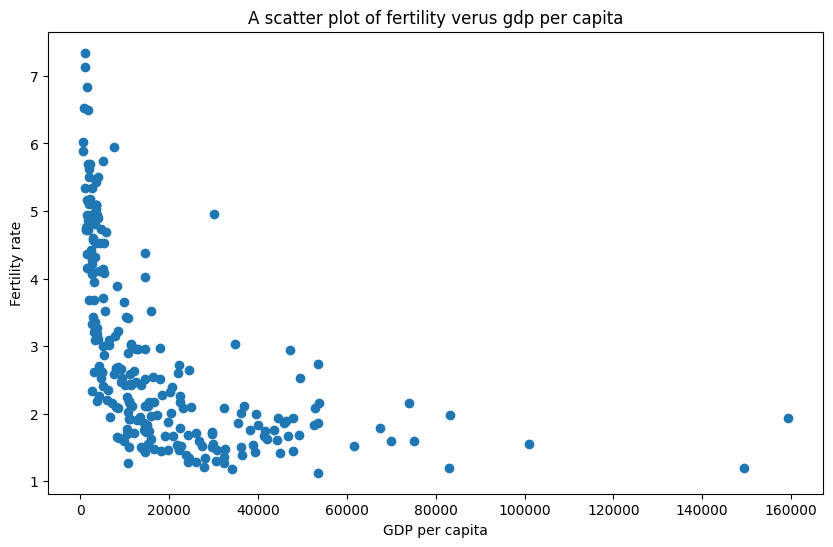

In [ ]:
#Making a scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(merged_data['gdp_2013'], merged_data['Fertility_rate_2013'])
plt.xlabel('GDP per capita')
plt.ylabel('Fertility rate')
plt.title('A scatter plot of fertility verus gdp per capita')
plt.show()

In [ ]:
correlation_coefficient = merged_data['Fertility_rate_2013'].corr(merged_data['gdp_2013'])
print('Correlation coefficient:', correlation_coefficient)

Correlation coefficient: -0.5171011715833219


In [ ]:
#Load the file into dataframe
average_house_price = pd.read_excel('Monthly Average House Price.xls')

In [ ]:
#Naming the first column
average_house_price.rename(columns={average_house_price.columns[0]: 'Date'}, inplace=True)
average_house_price['Date'] = pd.to_datetime(average_house_price['Date'], dayfirst=True)

#Making the date column index for easier plotting
average_house_price.set_index('Date', inplace=True)

average_house_price_filtered = average_house_price.loc['01/01/1991':'31/12/2016']


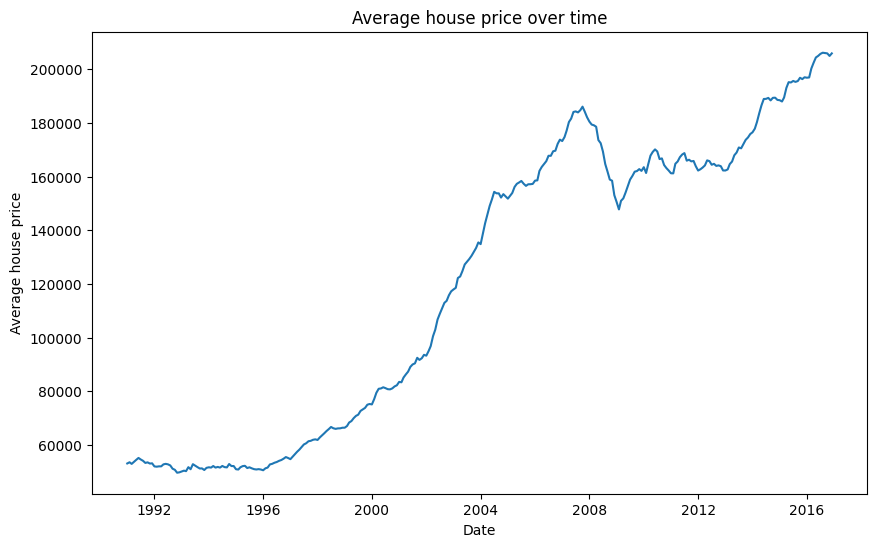

In [ ]:
#Plotting the time series
plt.figure(figsize=(10, 6))
plt.plot(average_house_price_filtered.index, average_house_price_filtered['Average House Price'])
plt.xlabel('Date')
plt.ylabel('Average house price')
plt.title('Average house price over time')
plt.show()

In [ ]:
# Calculating monthly return using
average_house_price_filtered.loc[:, 'Monthly return'] = average_house_price_filtered['Average House Price'].pct_change()

# Drop NaN values
monthly_returns = average_house_price_filtered['Monthly return'].dropna()

# Calculating ACF
autocorrelation_function = acf(monthly_returns, nlags=20)


In [ ]:
n = len(monthly_returns)
confidence_interval = 1.96 / np.sqrt(n) #for significance p < 0.05, we determine 95% confidence interval

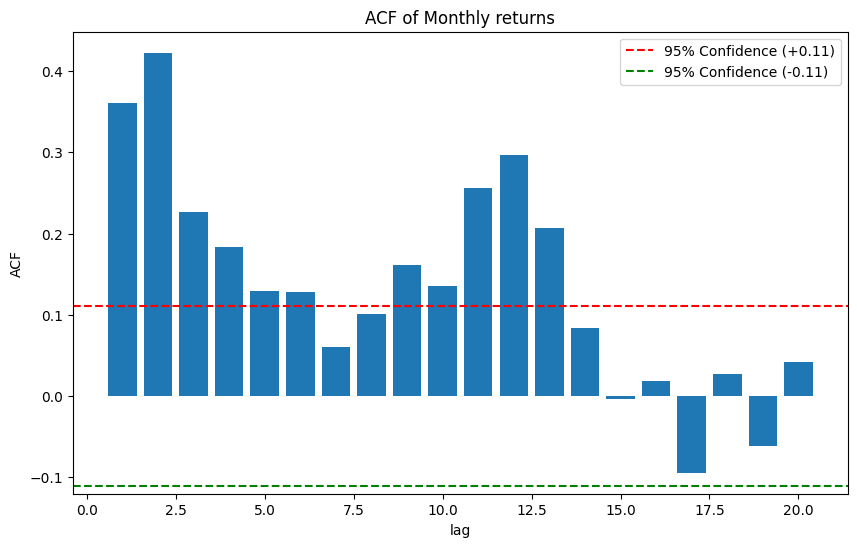

In [ ]:
#Plotting bar graph
plt.figure(figsize=(10, 6))
plt.bar(np.arange(1, 21), autocorrelation_function[1:21])

plt.axhline(y=confidence_interval, linestyle='--', color='red', label=f'95% Confidence (+{confidence_interval:.2f})')
plt.axhline(y=-confidence_interval, linestyle='--', color='green', label=f'95% Confidence (-{confidence_interval:.2f})')

plt.xlabel('lag')
plt.ylabel('ACF')
plt.title('ACF of Monthly returns')
plt.legend()
plt.show()

In [ ]:
#Calculating annualized return in percent
num_years = (average_house_price_filtered.index[-1] - average_house_price_filtered.index[0]).days / 365.25
V1 = average_house_price_filtered['Average House Price'].iloc[0]
V2 = average_house_price_filtered['Average House Price'].iloc[-1]
annualized_return_percent = (np.power(V2 / V1, 1 / num_years) - 1) * 100
print('Annualized return in percent:', annualized_return_percent)

Annualized return in percent: 5.371945508434539


In [ ]:
#Load the file into dataframe
FTSE = pd.read_csv('FTSE100.csv')

In [ ]:
FTSE_reversed = FTSE.sort_values(by='Date', ascending=True)

In [ ]:
FTSE_reversed['return'] = FTSE_reversed['Adj Close'].pct_change()

In [ ]:
FTSE_reversed['Comulative_return'] = (1 + FTSE_reversed['return']).cumprod()

average_house_price['Comulative_return'] = (1 + average_house_price_filtered['Monthly return']).cumprod()

In [ ]:
average_house_price['Normalized'] = average_house_price['Comulative_return'] / average_house_price['Comulative_return'].dropna().iloc[0]*100
FTSE_reversed['Normalized'] = FTSE_reversed['Comulative_return'] / FTSE_reversed['Comulative_return'].dropna().iloc[0]*100


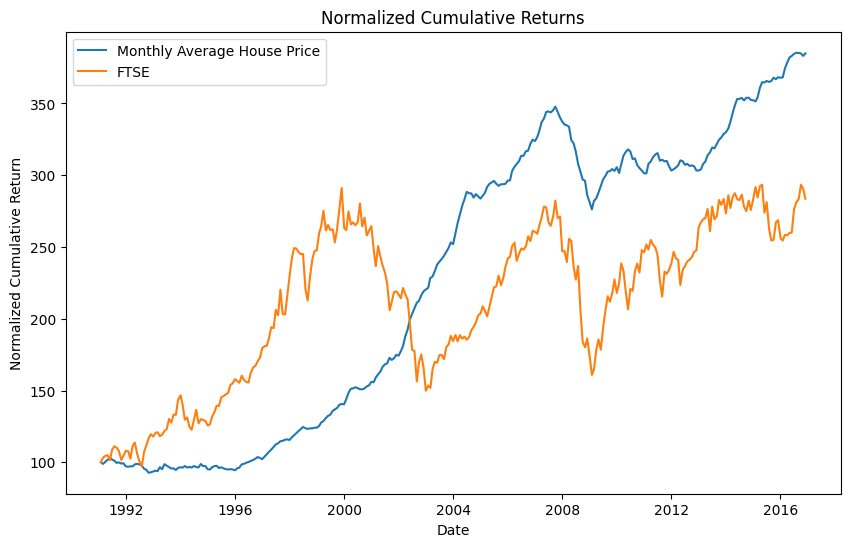

In [ ]:
plt.figure(figsize=(10, 6))
plt.plot(average_house_price.index, average_house_price['Normalized'], label='Monthly Average House Price')
FTSE_reversed['Date'] = pd.to_datetime(FTSE_reversed['Date'], errors='coerce')

plt.plot(FTSE_reversed['Date'], FTSE_reversed['Normalized'], label='FTSE')

plt.title('Normalized Cumulative Returns')
plt.xlabel('Date')
plt.ylabel('Normalized Cumulative Return')
plt.legend()

plt.show()

In [ ]:
#Calculating annualized return
n_years = (FTSE_reversed['Date'].iloc[-1] - FTSE_reversed['Date'].iloc[0]).days / 365.25
V_initial = FTSE_reversed['Adj Close'].iloc[0]
V_final = FTSE_reversed['Adj Close'].iloc[-1]
annualized_return = (np.power(V_final / V_initial, 1 / n_years) - 1)
print('Annualized return:', annualized_return)

Annualized return: 0.04477211147944482


The annualized return for the house is 5.37%. That of the stock marker is 0.0447 = 4.47%. Therefore, it is better to invest on the house as it has higher annual return.